<a href="https://colab.research.google.com/github/phonsoswag/mlops_zoomcamp_hw/blob/main/ML_Zoomcamp_HW_2_Phonso_Balagtas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-20 11:36:52--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.009s  

2023-09-20 11:36:52 (152 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline



In [ ]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<Axes: xlabel='median_house_value', ylabel='Count'>

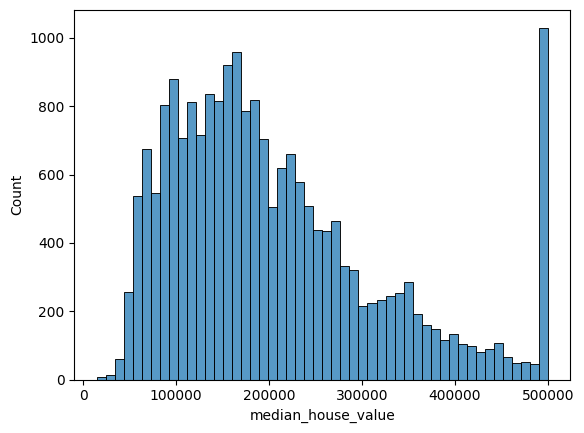

In [ ]:
sns.histplot(df['median_house_value'], bins=50)


In [ ]:
cols = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
        'median_income', 'households', 'median_house_value']
df_cols = df[cols]
df_cols

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,households,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,8.3252,126.0,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,8.3014,1138.0,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,7.2574,177.0,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,5.6431,219.0,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,3.8462,259.0,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,1.5603,330.0,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,2.5568,114.0,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,1.7000,433.0,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,1.8672,349.0,84700.0


In [ ]:
df_cols.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
median_income           0
households              0
median_house_value      0
dtype: int64

In [ ]:
df_cols.median(axis=0)

latitude                  34.2600
longitude               -118.4900
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
median_income              3.5348
households               409.0000
median_house_value    179700.0000
dtype: float64

# Prep Dataset


In [ ]:
n = len(df_cols)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [ ]:
n_train

12384

In [ ]:
idx = np.arange(n)


In [ ]:
idx[:n_train]

array([    0,     1,     2, ..., 12381, 12382, 12383])

In [ ]:
df_cols.iloc[:n_train]

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,households,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,8.3252,126.0,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,8.3014,1138.0,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,7.2574,177.0,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,5.6431,219.0,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,3.8462,259.0,342200.0
...,...,...,...,...,...,...,...,...,...
12379,33.78,-116.46,33.0,2565.0,745.0,2301.0,2.5477,638.0,83000.0
12380,33.77,-116.47,26.0,4300.0,767.0,1557.0,4.4107,669.0,122500.0
12381,33.78,-116.47,27.0,1781.0,441.0,759.0,3.3162,340.0,113600.0
12382,33.73,-116.38,10.0,11836.0,2405.0,3811.0,4.0079,1570.0,134500.0


In [ ]:
np.random.seed(42)
np.random.shuffle(idx)

In [ ]:
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [ ]:
df_train = df_cols.iloc[idx[:n_train]]
df_val = df_cols.iloc[idx[n_train:n_train+n_val]]
df_test = df_cols.iloc[idx[n_train+n_val:]]

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [ ]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [ ]:
df_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
median_income           0
households              0
dtype: int64

# Training


In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [ ]:
## Fill 0
X_train = df_train.fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [ ]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)


0.3413135910156676

In [ ]:
X_val = df_val.fillna(0).values
y_pred = w0 + X_val.dot(w)
rmse_fill0 = rmse(y_val, y_pred)
rmse_fill0

0.3295330365229516

In [ ]:
rmse_fill0_rounded = round(rmse_fill0, 2)
rmse_fill0_rounded

0.33

In [ ]:
## Mean
X_train = df_train.fillna(df_train.mean()).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [ ]:
rmse(y_train, y_pred)


0.34104161810328065

In [ ]:
X_val = df_val.fillna(df_val.mean()).values
y_pred = w0 + X_val.dot(w)
rmse_mean = rmse(y_val, y_pred)
rmse_mean

0.3290195439003508

In [ ]:
rmse_mean_rounded = round(rmse_mean, 2)
rmse_mean_rounded

0.33

# With Reg

In [ ]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [ ]:
for r in [0.0, 0.000001, 0.0001, 0.001, 0.1, 1, 5, 10]:
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)

    print(r, w0, score)

0.0 -11.68697524182867 0.33
1e-06 -11.686959175871557 0.33
0.0001 -11.685368865381841 0.33
0.001 -11.670931318027604 0.33
0.1 -10.27450028214712 0.33
1 -4.920480897817319 0.33
5 -1.4820957456309936 0.34
10 -0.7899311832054842 0.34


# Testing seeds

In [ ]:
score_list = []
for seed in range(10):
  idx = np.arange(n)

  np.random.seed(seed)
  np.random.shuffle(idx)

  df_train = df_cols.iloc[idx[:n_train]]
  df_val = df_cols.iloc[idx[n_train:n_train+n_val]]
  df_test = df_cols.iloc[idx[n_train+n_val:]]

  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  y_train = np.log1p(df_train.median_house_value.values)
  y_val = np.log1p(df_val.median_house_value.values)
  y_test = np.log1p(df_test.median_house_value.values)

  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  X_train = df_train.fillna(0).values
  w0, w = train_linear_regression(X_train, y_train)

  X_val = df_val.fillna(0).values
  y_pred = w0 + X_val.dot(w)
  score = round(rmse(y_val, y_pred), 2)
  score_list.append(score)

  print(f"Seed: {seed}\n\tRMSE: {score}")

Seed: 0
	RMSE: 0.34
Seed: 1
	RMSE: 0.34
Seed: 2
	RMSE: 0.33
Seed: 3
	RMSE: 0.34
Seed: 4
	RMSE: 0.34
Seed: 5
	RMSE: 0.34
Seed: 6
	RMSE: 0.35
Seed: 7
	RMSE: 0.34
Seed: 8
	RMSE: 0.35
Seed: 9
	RMSE: 0.34


In [ ]:
score_list

[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]

In [ ]:
rounded_std = round(np.std(score_list), 3)
rounded_std

0.005

# Seed num 9

In [ ]:
seed = 9

idx = np.arange(n)

np.random.seed(seed)
np.random.shuffle(idx)

df_train = df_cols.iloc[idx[:n_train]]
df_val = df_cols.iloc[idx[n_train:n_train+n_val]]
df_test = df_cols.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']



In [ ]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = np.concatenate([y_train, y_val])


In [ ]:
X_train = df_full_train.fillna(0).values
w0, w = train_linear_regression_reg(X_train, y_full_train, r =0.001)

X_test = df_test.fillna(0).values
y_pred = w0 + X_test.dot(w)
score = round(rmse(y_test, y_pred), 2)

print(f"Seed: {seed}\n\tRMSE: {score}")

Seed: 9
	RMSE: 0.35
